In [38]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import random
from scipy.spatial import Delaunay
from matplotlib.path import Path

[]

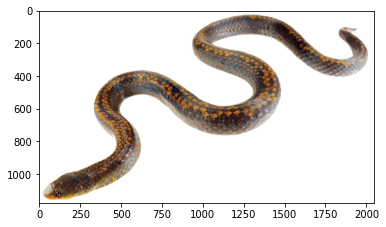

In [43]:
# Load image 
img = mpimg.imread('snake.png')
# Show Image
plt.imshow(img)
plt.plot()

In [49]:
num_points = 300
height, width = len(img), len(img[0])

points = [(0,0),(0,width - 1),(height - 1,0),(height - 1,width - 1)]

pixels_per_run = 100

sweep_square_side = 10 * 2 + 1

In [50]:
tri = Delaunay(points)

for i in range(num_points):
    diff_dict = {}
    for j in range(pixels_per_run):
        new_pixel = [np.random.randint(height),np.random.randint(width)]
        n_triangle = tri.find_simplex(new_pixel)
        difference = 0
        count = 1
        for x in range(sweep_square_side):
            for y in range(sweep_square_side):
                neighbor_pixel = new_pixel.copy()
                neighbor_pixel[0] += x - int(sweep_square_side / 2)
                neighbor_pixel[1] += y - int(sweep_square_side / 2)
                if(tri.find_simplex(neighbor_pixel) == n_triangle):
                    count += 1
                    difference += sum(np.absolute(img[tuple(neighbor_pixel)] - img[tuple(new_pixel)]))
        diff_dict[tuple(new_pixel)] = difference / count
    best_pixel = max(diff_dict, key=diff_dict.get)
    
    points.append(best_pixel)
    tri = Delaunay(points)
    
    
    

In [51]:
img_with_points = img.copy()

triangles = tri.simplices
color_list = []

for triangle in triangles:
    vx = points[triangle[0]]
    vy = points[triangle[1]]
    vz = points[triangle[2]]
    min_px = min(vx[0],vy[0],vz[0])
    max_px = max(vx[0],vy[0],vz[0])
    min_py = min(vx[1],vy[1],vz[1])
    max_py = max(vx[1],vy[1],vz[1])
    
    avg_col = [0,0,0,0]
    num_of_v = 0
    
    path = Path([vx,vy,vz])
    
    for i in range(min_px,max_px):
        for j in range(min_py,max_py):
            if(path.contains_point((i,j))):
                avg_col += img[i,j]
                num_of_v += 1
    avg_col /= num_of_v
    color_list.append(avg_col)
    
    for i in range(min_px,max_px):
        for j in range(min_py,max_py):
            if(path.contains_point((i,j))):
                img_with_points[i,j] = color_list[-1]



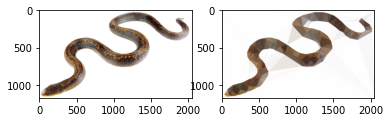

In [52]:
fig = plt.figure("Show two images")

ax = fig.add_subplot(1,2,1)
plt.imshow(img)
ax = fig.add_subplot(1,2,2)
plt.imshow(img_with_points)
plt.show()

# Save image
mpimg.imsave("image_with_points.png",img_with_points)